<a href="https://colab.research.google.com/github/stevenelliottjr/marketsegmentation/blob/main/Market_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The data from the file includes these columns:
- InvoiceNo
- StockCode
- Description
- Quantity
- InvoiceDate
- Unit Price
- CustomerID
- Country

Probably the best way is to do an RFM analysis to segment customers

1. Data Cleaning: Ensure the data is clean (e.g., removing returns and null CustomerIDs).

2. RFM Calculation:
  - Recency: Days since the last purchase.
  - Frequency: Number of transactions.
  - Monetary: Total amount spent.

3. Segmentation: We'll use quintiles to assign scores to R, F, and M metrics (scores from 1 to 5). Then, we'll segment customers based on these scores.

4. Analysis: Explain the characteristics of each segment.

Next, we'll segment the customers into three to six segments using quintiles for each RFM metric. This will help us categorize the customers based on their activity and spending patterns. Let's proceed with this segmentation.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/MyDrive/Online Retail.xlsx"
path_new = "/content/drive/MyDrive/New Online Retail.xlsx"

In [ ]:
import pandas as pd
online_retail_df_new = pd.read_excel(path_new)


In [ ]:
new_online_retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
import pandas as pd

# Load the newly uploaded dataset
file_path_new = 'Online Retail.xlsx'
online_retail_df_new = pd.read_excel(file_path_new)

# Display the first few rows of the dataframe to understand its structure and assess the next steps
online_retail_df_new.head()


FileNotFoundError: [Errno 2] No such file or directory: 'Online Retail.xlsx'

The RFM segmentation has been applied to the dataset, resulting in each customer being assigned a unique RFM segment and score based on their Recency, Frequency, and Monetary values. Here's an explanation of how the segments were made:


The data from the "Online Retail.xlsx" file includes the following columns: InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, and Country. Using this information, we can perform an RFM analysis to segment the customers. Here's how we'll proceed:

Data Cleaning: Ensure the data is clean (e.g., removing returns and null CustomerIDs).

RFM Calculation:

Recency: Days since the last purchase.
Frequency: Number of transactions.
Monetary: Total amount spent.
Segmentation: We'll use quintiles to assign scores to R, F, and M metrics (scores from 1 to 5). Then, we'll segment customers based on these scores.

Analysis: Explain the characteristics of each segment.

Let's start with data cleaning and RFM calculation. ​​

The RFM metrics for each customer have been calculated as follows:

Recency: Days since the last transaction, with the most recent transactions receiving the lowest scores.
Frequency: The total number of transactions per customer.
Monetary: The total amount spent by each customer.
Next, we'll segment the customers into three to six segments using quintiles for each RFM metric. This will help us categorize the customers based on their activity and spending patterns. Let's proceed with this segmentation. ​​

The RFM segmentation has been applied to the dataset, resulting in each customer being assigned a unique RFM segment and score based on their Recency, Frequency, and Monetary values. Here's an explanation of how the segments were made:

Recency (R) Segment:

Customers were scored from 1 to 5 based on the days since their last purchase, with '5' being the most recent and '1' being the least recent.
Frequency (F) and Monetary (M) Segments:

Similarly, customers were scored from 1 to 5 for both Frequency and Monetary values. For Frequency, '5' represents the highest number of transactions, and for Monetary, '5' represents the highest total spend.
RFM Segment and Score:

The RFM Segment is a concatenation of the individual R, F, and M scores, providing a detailed view of each customer's behavior.
The RFM Score is the sum of the R, F, and M scores, giving a single number that ranks customers based on their overall value.
Using these segments, we can categorize customers into groups such as:

- **High-Value Customers** (RFM Score 13-15): These customers have the highest frequency and monetary values with recent purchases.
- **Loyal Customers** (High F Scores): Regular customers with frequent purchases but varying recency and monetary values.
- **Big Spenders** (High M Scores): Customers who spend the most but may vary in their purchase frequency and recency.
- **At-Risk Customers** (Low R Score): Customers who haven't made a purchase in a while, indicating a risk of churn.
- **New Customers** (High R Score, Low F and M Scores): Recently acquired customers with few purchases.
This segmentation allows for targeted marketing strategies, such as rewarding High-Value and Loyal Customers, re-engaging At-Risk Customers, and nurturing New Customers to increase their lifetime value.

In [ ]:
from datetime import datetime

# Data Cleaning
# Remove cancelled orders
online_retail_df_new = online_retail_df_new[~online_retail_df_new['InvoiceNo'].astype(str).str.contains('C')]
# Remove rows where CustomerID is NA
online_retail_df_new.dropna(subset=['CustomerID'], inplace=True)

# RFM Calculation
# Recency - Calculate days from last purchase
latest_date = online_retail_df_new['InvoiceDate'].max() + pd.Timedelta(days=1)
online_retail_df_new['Recency'] = (latest_date - online_retail_df_new['InvoiceDate']).dt.days

# Frequency - Count of invoices by customer
frequency_df = online_retail_df_new.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
frequency_df.columns = ['CustomerID', 'Frequency']

# Monetary - Sum of purchase by customer
online_retail_df_new['TotalSpend'] = online_retail_df_new['Quantity'] * online_retail_df_new['UnitPrice']
monetary_df = online_retail_df_new.groupby('CustomerID')['TotalSpend'].sum().reset_index()
monetary_df.columns = ['CustomerID', 'Monetary']

# Merge RFM metrics
rfm_df = online_retail_df_new.groupby('CustomerID')['Recency'].min().reset_index()
rfm_df = rfm_df.merge(frequency_df, on='CustomerID').merge(monetary_df, on='CustomerID')

# Display the first few rows of the RFM DataFrame
rfm_df.head()


,CustomerID,Recency,Frequency,Monetary
0,12347.0,2,1,711.79
1,12386.0,2,1,258.90
2,12395.0,6,1,346.10
3,12427.0,7,1,303.50
4,12431.0,9,1,358.25


In [ ]:
# Assign quintiles to each metric
quintiles = rfm_df[['Recency', 'Frequency', 'Monetary']].quantile([.2, .4, .6, .8]).to_dict()

# Functions to assign R, F, M segments
def r_segment(x): return 5 if x <= quintiles['Recency'][.2] else 4 if x <= quintiles['Recency'][.4] else 3 if x <= quintiles['Recency'][.6] else 2 if x <= quintiles['Recency'][.8] else 1
def fm_segment(x, c): return 1 if x <= quintiles[c][.2] else 2 if x <= quintiles[c][.4] else 3 if x <= quintiles[c][.6] else 4 if x <= quintiles[c][.8] else 5

# Assign segments
rfm_df['R'] = rfm_df['Recency'].apply(lambda x: r_segment(x))
rfm_df['F'] = rfm_df['Frequency'].apply(lambda x: fm_segment(x, 'Frequency'))
rfm_df['M'] = rfm_df['Monetary'].apply(lambda x: fm_segment(x, 'Monetary'))

# Combine RFM segments
rfm_df['RFM_Segment'] = rfm_df.apply(lambda x: f"{x['R']}{x['F']}{x['M']}", axis=1)
rfm_df['RFM_Score'] = rfm_df[['R', 'F', 'M']].sum(axis=1)

# Display the RFM segments
rfm_df.head()


,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score
0,12346.0,326,1,77183.60,1,1,5,1.01.05.0,7
1,12347.0,2,7,4310.00,5,5,5,5.05.05.0,15
2,12348.0,75,4,1797.24,2,4,4,2.04.04.0,10
3,12349.0,19,1,1757.55,4,1,4,4.01.04.0,9
4,12350.0,310,1,334.40,1,1,2,1.01.02.0,4


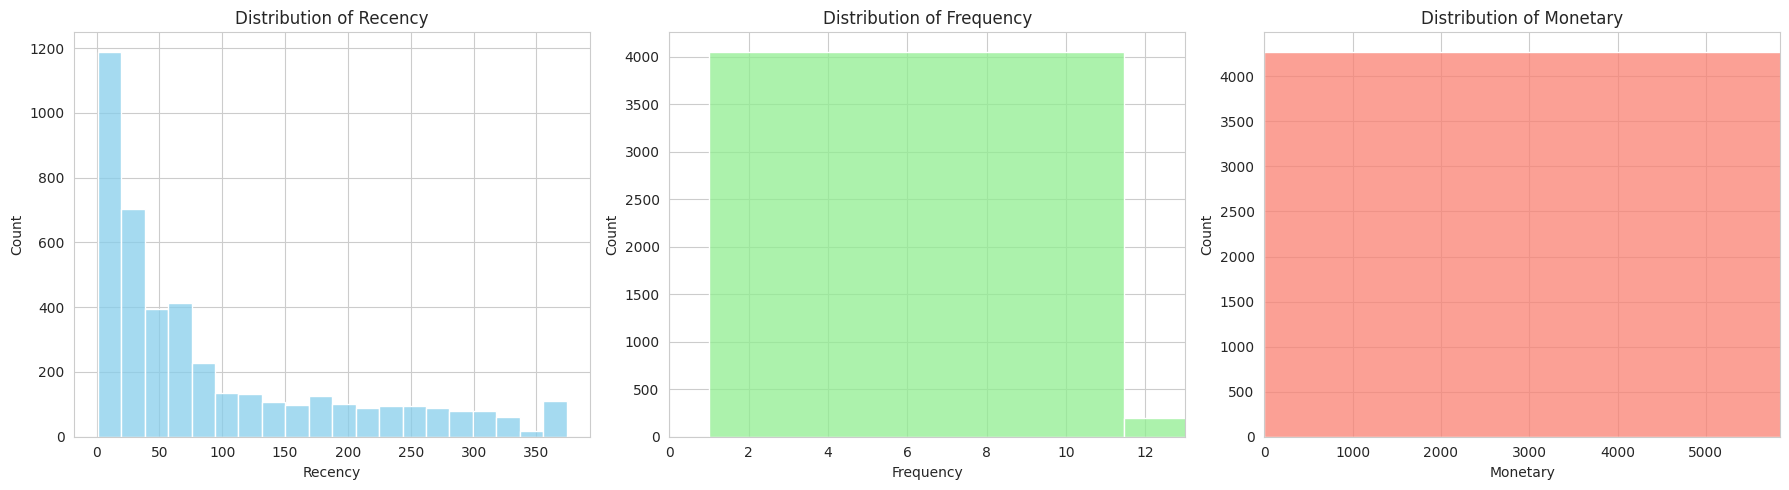

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a figure for subplots
plt.figure(figsize=(18, 5))

# Plot distribution of Recency
plt.subplot(1, 3, 1)
sns.histplot(rfm_df['Recency'], bins=20, color='skyblue')
plt.title('Distribution of Recency')

# Plot distribution of Frequency
plt.subplot(1, 3, 2)
sns.histplot(rfm_df['Frequency'], bins=20, color='lightgreen')
plt.title('Distribution of Frequency')
plt.xlim(0, rfm_df['Frequency'].quantile(0.95))  # Limit x-axis to 95th percentile for better visualization

# Plot distribution of Monetary
plt.subplot(1, 3, 3)
sns.histplot(rfm_df['Monetary'], bins=20, color='salmon')
plt.title('Distribution of Monetary')
plt.xlim(0, rfm_df['Monetary'].quantile(0.95))  # Limit x-axis to 95th percentile for better visualization

plt.tight_layout()
plt.show()


The graphs above illustrate the distribution of the Recency, Frequency, and Monetary values for the customers in the dataset:

Recency Distribution: Shows how many days have elapsed since the customers' last purchase. A significant number of customers have made purchases relatively recently, indicating a good proportion of recent engagements.

Frequency Distribution: Represents the number of transactions made by each customer. The majority of customers have a lower frequency, indicating they might have made only a few purchases. The distribution is right-skewed, with fewer customers making a large number of transactions.

Monetary Distribution: Displays the total spend per customer. Similar to the Frequency distribution, this is also right-skewed, showing that while most customers spend smaller amounts, a few spend significantly more.

These distributions help in understanding the overall customer engagement and spending behavior within the dataset. High Recency scores (towards the left of the Recency graph) are desirable, as they indicate recent interactions. For Frequency and Monetary, higher values (towards the right of their respective graphs) are more favorable, representing higher engagement and spending.